In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("global_food_wastage_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [5]:
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64


In [8]:
# Summary statistics
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [9]:
# Set style for visualization
sns.set_style("whitegrid")

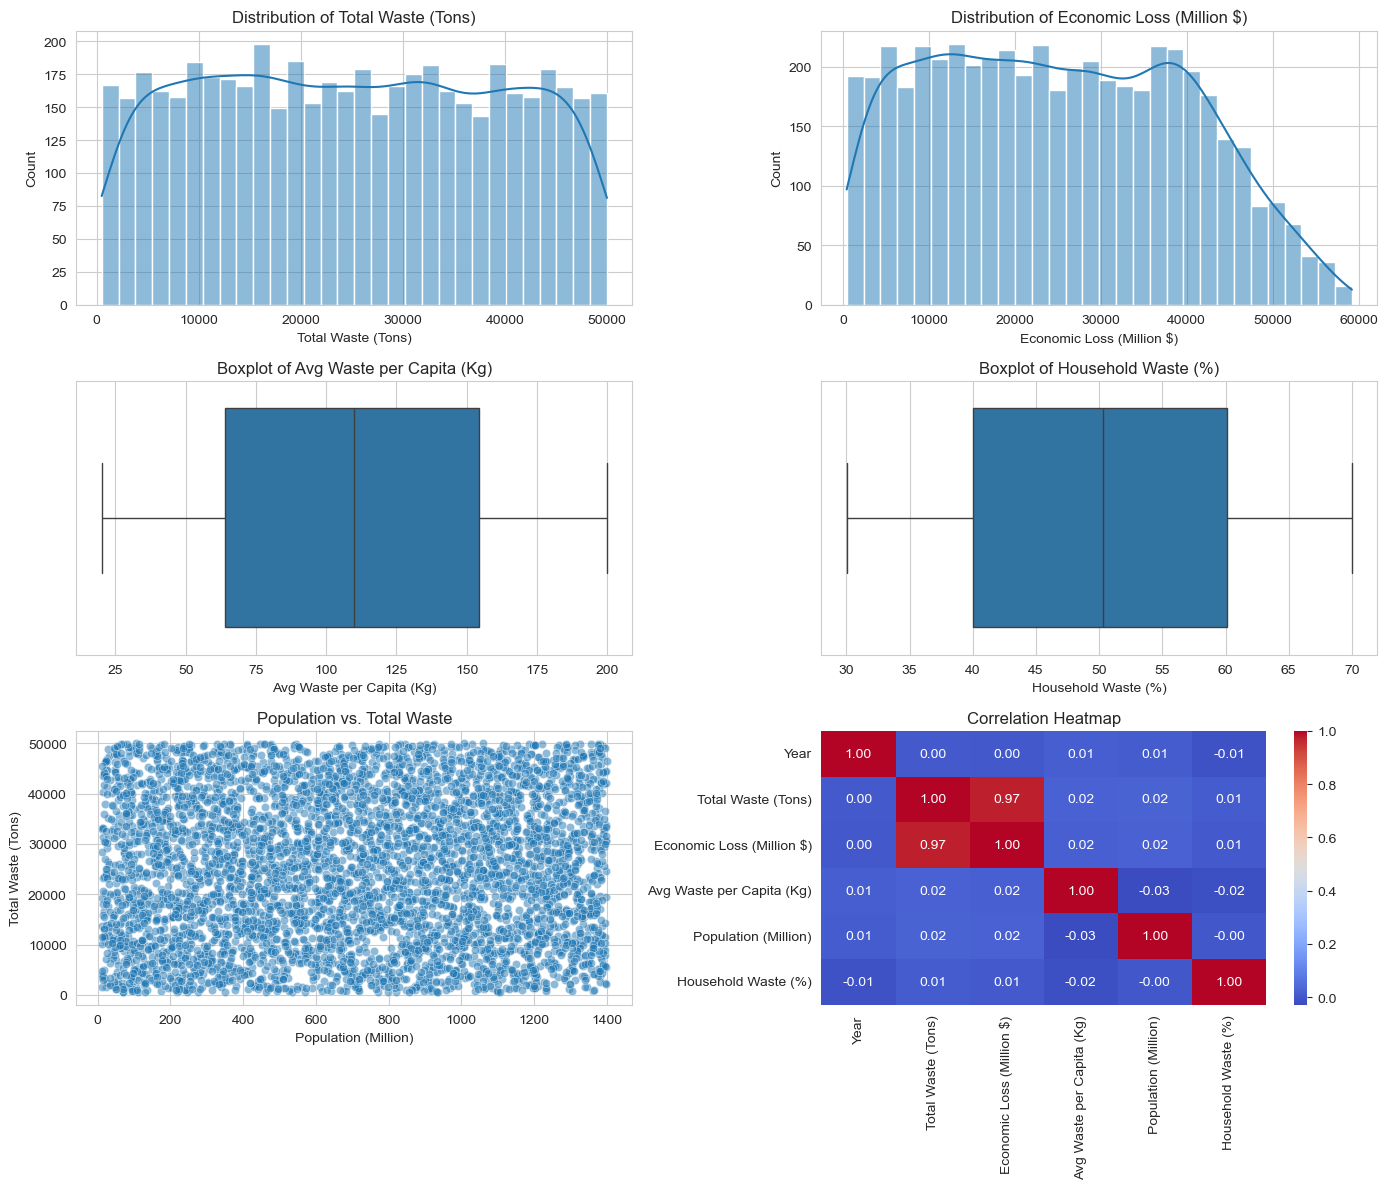

In [16]:
# 1. Distribution Analysis

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

sns.histplot(df["Total Waste (Tons)"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Total Waste (Tons)")

sns.histplot(df["Economic Loss (Million $)"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Economic Loss (Million $)")

sns.boxplot(x=df["Avg Waste per Capita (Kg)"], ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Avg Waste per Capita (Kg)")

sns.boxplot(x=df["Household Waste (%)"], ax=axes[1, 1])
axes[1, 1].set_title("Boxplot of Household Waste (%)")

sns.scatterplot(x=df["Population (Million)"], y=df["Total Waste (Tons)"], alpha=0.5, ax=axes[2, 0])
axes[2, 0].set_title("Population vs. Total Waste")

# Correlation heatmap
corr_matrix = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[2, 1])
axes[2, 1].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()

C:\Users\Bablu\AppData\Local\Temp\ipykernel_4084\955630546.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_food_categories.values, y=top_food_categories.index, palette="viridis", ax=axes[0])
C:\Users\Bablu\AppData\Local\Temp\ipykernel_4084\955630546.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma", ax=axes[1])


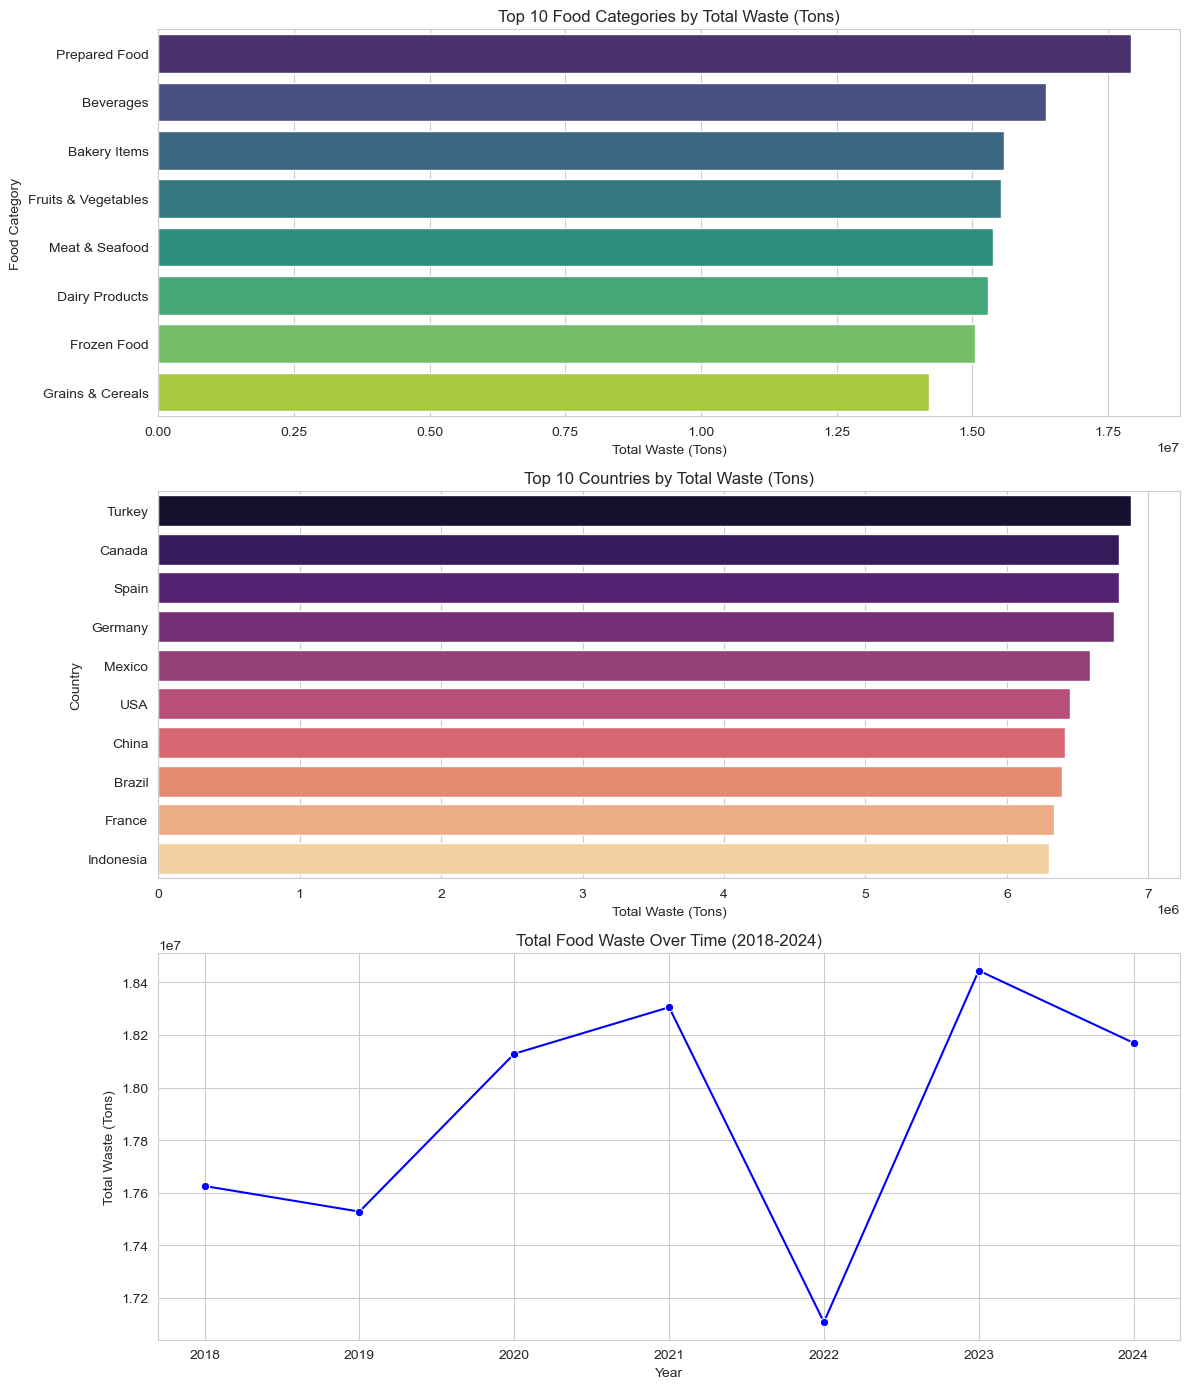

In [15]:
# 2. Top Contributing Categories & Countries


top_food_categories = df.groupby("Food Category")["Total Waste (Tons)"].sum().sort_values(ascending=False).head(10)
top_countries = df.groupby("Country")["Total Waste (Tons)"].sum().sort_values(ascending=False).head(10)
yearly_trend = df.groupby("Year")["Total Waste (Tons)"].sum()

fig, axes = plt.subplots(3, 1, figsize=(12, 14))

sns.barplot(x=top_food_categories.values, y=top_food_categories.index, palette="viridis", ax=axes[0])
axes[0].set_title("Top 10 Food Categories by Total Waste (Tons)")
axes[0].set_xlabel("Total Waste (Tons)")

sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma", ax=axes[1])
axes[1].set_title("Top 10 Countries by Total Waste (Tons)")
axes[1].set_xlabel("Total Waste (Tons)")

sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", color="b", ax=axes[2])
axes[2].set_title("Total Food Waste Over Time (2018-2024)")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Total Waste (Tons)")

plt.tight_layout()
plt.show()

C:\Users\Bablu\AppData\Local\Temp\ipykernel_4084\1297064298.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_per_capita_waste.values, y=top_per_capita_waste.index, palette="coolwarm", ax=axes[0])
C:\Users\Bablu\AppData\Local\Temp\ipykernel_4084\1297064298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=household_waste.values, y=household_waste.index, palette="plasma", ax=axes[1])


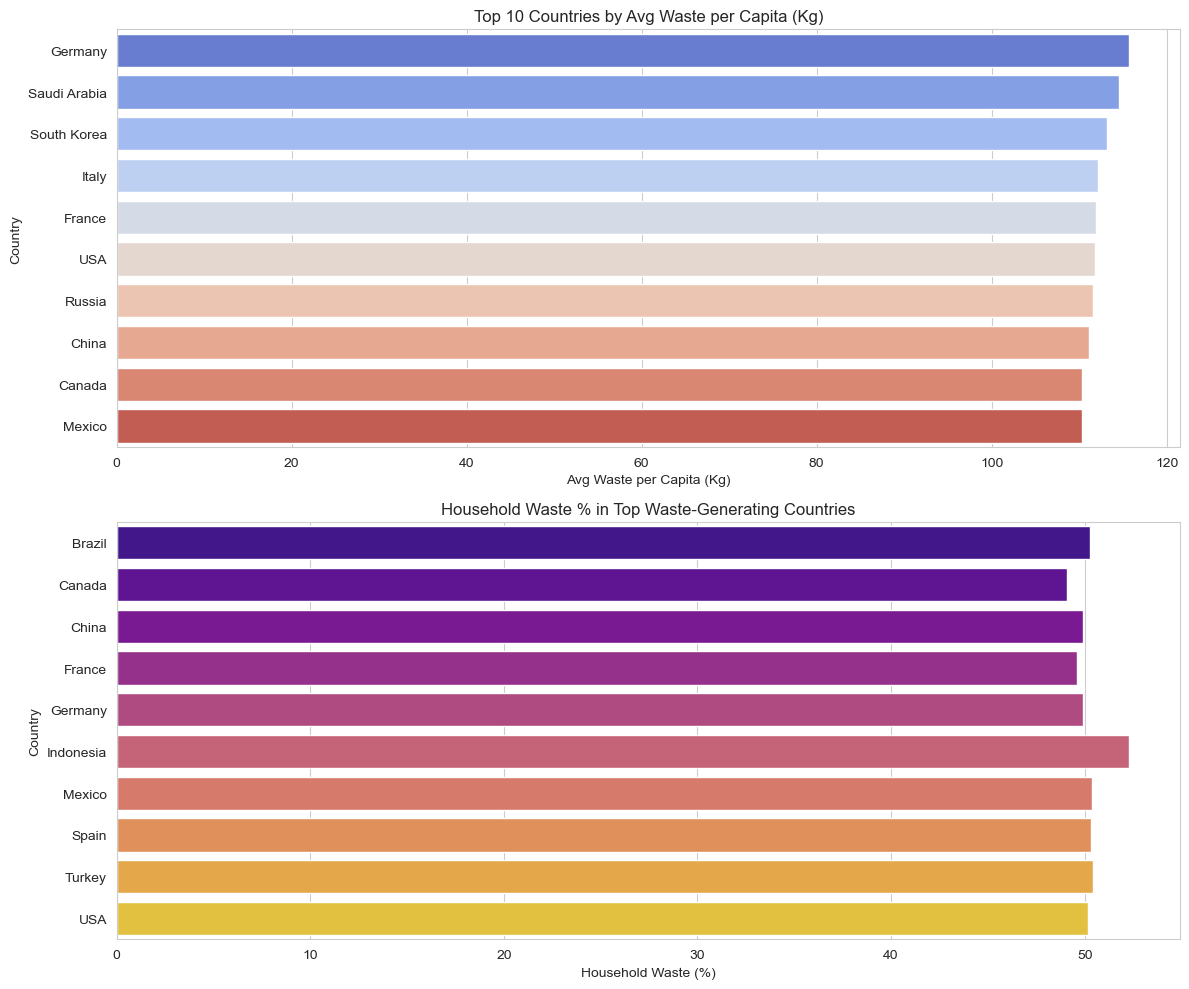

In [14]:

# 3. Per Capita Waste & Household Waste Analysis


top_per_capita_waste = df.groupby("Country")["Avg Waste per Capita (Kg)"].mean().sort_values(ascending=False).head(10)
top_countries_list = top_countries.index.tolist()
household_waste = df[df["Country"].isin(top_countries_list)].groupby("Country")["Household Waste (%)"].mean()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.barplot(x=top_per_capita_waste.values, y=top_per_capita_waste.index, palette="coolwarm", ax=axes[0])
axes[0].set_title("Top 10 Countries by Avg Waste per Capita (Kg)")
axes[0].set_xlabel("Avg Waste per Capita (Kg)")

sns.barplot(x=household_waste.values, y=household_waste.index, palette="plasma", ax=axes[1])
axes[1].set_title("Household Waste % in Top Waste-Generating Countries")
axes[1].set_xlabel("Household Waste (%)")

plt.tight_layout()
plt.show()
